<h1 style="text-align: center;">Desafío - Gráficos y correlación</h1>

- Para realizar este desafío debes haber estudiado previamente todo el material disponible correspondiente a la unidad.
- Una vez terminado el desafío, comprime la carpeta que contiene el desarrollo de los requerimientos solicitados y sube el .zip en el LMS.
- Desarrollo del desafío: individual
- Para la realización del desafío necesitarás apoyarte del archivo `Apoyo Desafío - Gráficos y correlación`, disponible en la <a href="https://empieza.desafiolatam.com/cohorts/2108/sections/79636/activities/120921/items/617749">plataforma</a>.

## Habilidades a evaluar
- Reconocer las funcionalidades avanzadas de gráficos estáticos mediante `seaborn`.
- Aprender a realizar gráficos que muestren de forma estratificada el comportamiento de subconjuntos de elementos en la muestra.
- Entender e interpretar la correlación a partir de diagramas de dispersión.

## Descripción
La empresa para la cual trabajas, te ha solicitado continuar el análisis de datos pero, esta vez, a partir de gráficos existentes y la correlación que existe entre ellos con la data disponible. Para ello, te entregan un material de apoyo el cual deberá servir como base para desarrollar los siguientes requerimientos.

## Requerimientos
A continuación revisaremos los requerimientos y acciones que te han sido solicitados:

### 1. Importar librerías y .csv. (2 punto) para ello:
- Importe las librerías básicas para el análisis de datos
- Descargue e importe el archivo nations.csv.

**Tip**: El formato del archivo posee una codificación de tipo `iso-8859-1`. Investigue cómo se puede solucionar este problema utilizando el argumento encoding de `pd.read_csv`.

La base de datos contiene información a nivel mundial sobre demografía:
- `country`: País.
- `region`: Continente del país.
- `gdp`: Producto Interno Bruto per cápita, precios 2005.
- `school`: Promedio años de escolaridad.
- `adfert`: Fertilidad adolescente (Nacimientos 1:1000 en mujeres entre 15 y 19).
- `chldmort`: Probabilidad de muerte antes de los 5 años por cada 1000.
- `life`: Esperanza de vida al nacer.
- `pop`: Población total.
- `urban`: Porcentaje de población urbana.
- `femlab`: Tasa entre hombres y mujeres en el mercado laboral.
- `literacy`: Tasa de alfabetismo.
- `co2`: Toneladas de Co2 mitidas per cápita.
- `gini`: Coeficiente de desigualdad del ingreso.
- **Apellidos desde la A hasta la N**: Enfocarse en las variables `chldmort`, `adfert` y `life`.
- **Apellidos desde la M hasta la Z**: Enfocarse en las variables `femlab`, `literacy` y `school`.

In [17]:
# Utiliza esta celda para importar TODOS los módulos necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
my_cols = ['chldmort','adfert','life']

In [18]:
# Utiliza esta celda para importar el set de datos según lo solicitado
df = pd.read_csv('nations.csv',encoding='ISO-8859-1').drop(columns=['Unnamed: 0'])
df.head()

,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


### 2. Refactorizar gráficos matplotlib a seaborn (3 puntos). 

A partir de una serie de gráficos construidos con matplotlib, se solicita refactorizarlos utilizando seaborn. Además, se presenta la función que se utilizó para construirlos. Intente llegar al
resultado con mayor similitud. Comente los principales resultados de los gráficos.

**Histogramas**
```python
def binarize_histogram(dataframe, variable):
    tmp = dataframe.copy()
    tmp['binarize'] = np.where(tmp[variable] > np.mean(tmp[variable]), 1, 0)
    hist_1 = tmp[tmp['binarize'] == 1][variable].dropna()
    hist_0 = tmp[tmp['binarize'] == 0][variable].dropna()
    
    plt.subplot(1, 2, 1)
    plt.hist(hist_0, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_0))
    plt.title("{0} <= {1}".format(variable, round(np.mean(hist_0), 3)))
    
    plt.subplot(1, 2, 2)
    plt.hist(hist_1, alpha=.6, color='lightgrey')
    plt.axvline(np.mean(hist_1))
    plt.title("{0} >= {1}".format(variable, round(np.mean(hist_0), 3)))
    
binarize_histogram(df, 'adfert')
```



In [19]:
# Utiliza esta celda para definir la función binarize_histogram refactorizada
def binarize_histogram(dataframe, variable):
    # Se debe crear una copia del df original para no alterar el original
    tmp = dataframe.copy()
    
    # Se crea columna binarizada (1 si es mayor a la media, 0 sino)
    bin_col = f'binarize_{variable}'
    media_var = np.mean(tmp[variable])
    tmp[bin_col] = np.where(tmp[variable] > media_var, 1, 0)
    
    # Se crea grilla de seaborn
    g = sns.FacetGrid(
        tmp,                             # Set de datos
        col=bin_col,                     # Nombre de la variable categórica por la que se creará cada gráfico de la grilla (1 para cada categoría)
        col_wrap=2,                      # Cantidad de columnas en la grilla (2 categorías -> 2 columnas)
        sharex=False                     # Queremos que cada gráfico tenga su propia escala en el eje x
    ).map(
        sns.histplot,                    # Gráfico a aplicar a cada elemento de la grilla
        variable,                        # Variable a la que se aplica el gráfico
        color="grey"                     # Los argumentos para modificar el histograma se pasan como kwargs en map
    ) 
    
    # Se obtiene la media para cada clase (0 ó 1) de la columna binarizada
    line_position = tmp.groupby(bin_col)[variable].mean().values

    # Se recorre cada figura de la grilla y su índice
    for i, ax in enumerate(g.axes.flat):
        # Se agrega en cada figura la línea vertical de la media
        ax.axvline(x=line_position[i], color='dodgerblue')
        
        # Símbolo mayor si es clase 1, menor o igual sino
        simbolo = '>' if i else '<='
        
        # Se agrega título para cada figura
        ax.set_title(f"{variable} {simbolo} {round(media_var, 2)}")

    plt.tight_layout()

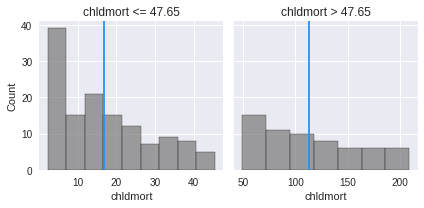

In [20]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 1
binarize_histogram(df,my_cols[0])

**Comentarios**: 

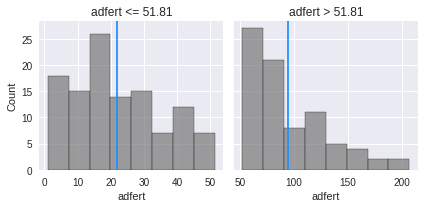

In [21]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 2
binarize_histogram(df,my_cols[1])

**Comentarios**

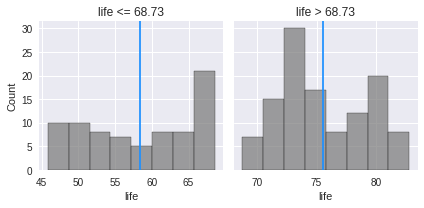

In [22]:
# Utiliza esta celda para graficar los histogramas solicitados utilizando la función refactorizada para tu variable 3
binarize_histogram(df,my_cols[2])

**Comentarios**

**Boxplots**
```python
def grouped_boxplot(dataframe, variable, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()
    
    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)
    
    for i, n in enumerate(stratify_by):
        ax[i].boxplot(tmp[tmp[group_by] == n][variable])
        ax[i].set_title(n)

grouped_boxplot(df, 'adfert', 'region')
```

<AxesSubplot:xlabel='region', ylabel='chldmort'>

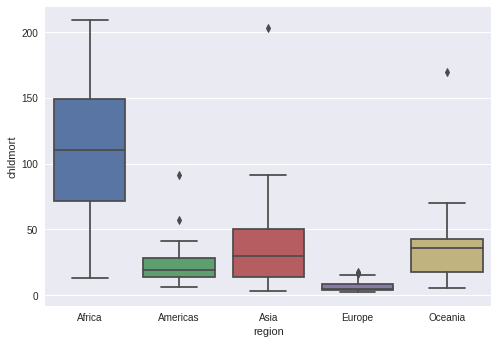

In [23]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 1
sns.boxplot(x='region', y=my_cols[0], data=df)

**Comentarios**

<AxesSubplot:xlabel='region', ylabel='adfert'>

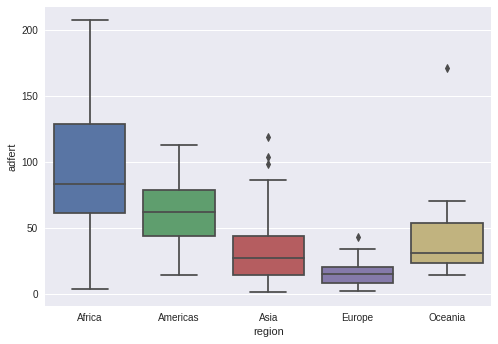

In [24]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 2
sns.boxplot(x='region', y=my_cols[1], data=df)

**Comentarios**

<AxesSubplot:xlabel='region', ylabel='life'>

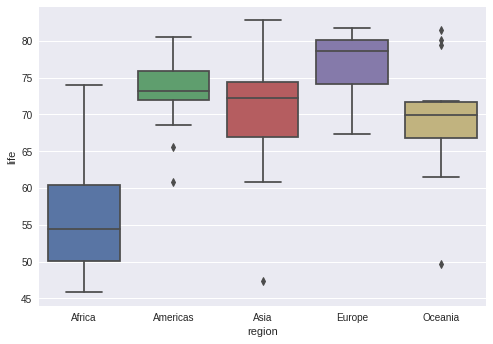

In [25]:
# Utiliza esta celda para graficar los boxplots solicitados utilizando seaborn para tu variable 3
sns.boxplot(x='region', y=my_cols[2], data=df)

**Comentarios**

**Scatterplots**

```python
def grouped_scatterplot(dataframe, x, y, group_by):
    tmp = dataframe
    stratify_by = tmp[group_by].unique()

    if len(stratify_by) / 2 > 3:
        fig, ax = plt.subplots(2, len(stratify_by),sharey=True)
    else:
        fig, ax = plt.subplots(1, len(stratify_by),sharey=True)

    for i, n in enumerate(stratify_by):
        tmp_group_plt = tmp[tmp[group_by] == n]
        ax[i].plot(tmp_group_plt[x], tmp_group_plt[y], 'o')
        ax[i].set_title(n)
        
grouped_scatterplot(df, 'school', 'adfert', 'region')
```

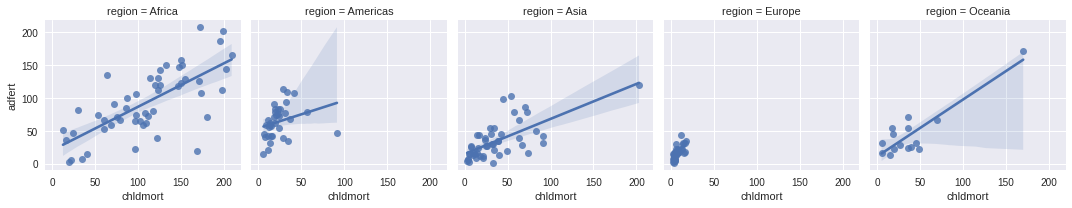

In [28]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 1
g = sns.FacetGrid(df,col='region',col_wrap=5) #Definion de la grilla
g.map(plt.scatter,my_cols[0],my_cols[1]);
#g.map(sns.regplot,my_cols[0],my_cols[1]);

**Comentarios**

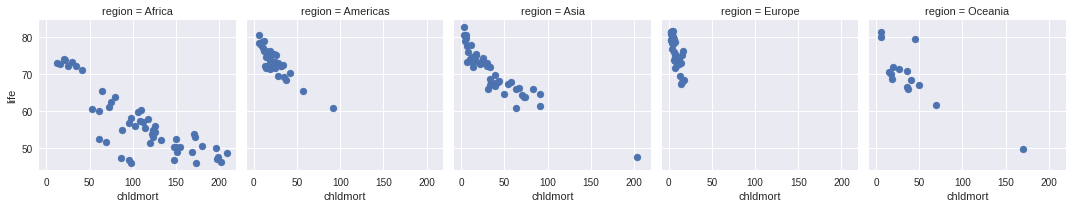

In [29]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 2
g = sns.FacetGrid(df,col='region',col_wrap=5) #Definion de la grilla
g.map(plt.scatter,my_cols[0],my_cols[2]);

**Comentarios**

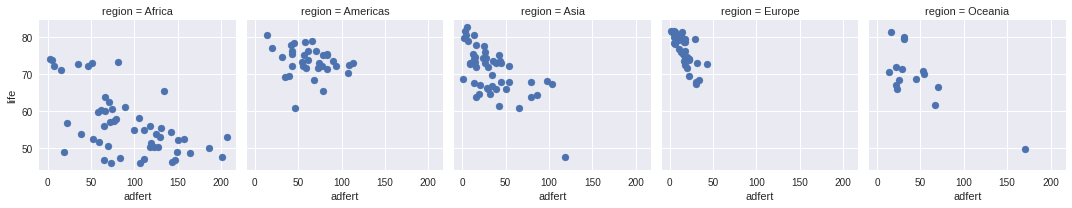

In [30]:
# Utiliza esta celda para graficar los scatterplots solicitados utilizando seaborn para region y tu variable 3
g = sns.FacetGrid(df,col='region',col_wrap=5) #Definion de la grilla
g.map(plt.scatter,my_cols[1],my_cols[2]);

**Comentarios**

### 3. Generar un heatmap entre todas las variables (2 puntos):
Con base en las variables de interés asignadas, comente cuáles son las principales correlaciones existentes, tomando como criterio de corte aquellas superior a .6

In [32]:
# Usa esta celda para generar df de correlaciones solicitado, con valor absoluto
df_corr = df[my_cols].corr().abs()
df_corr

,chldmort,adfert,life
chldmort,1.000000,0.777416,0.923563
adfert,0.777416,1.000000,0.731787
life,0.923563,0.731787,1.000000


In [33]:
df_corr > 0.6 #Prueba lógica para verificar

,chldmort,adfert,life
chldmort,True,True,True
adfert,True,True,True
life,True,True,True


<AxesSubplot:>

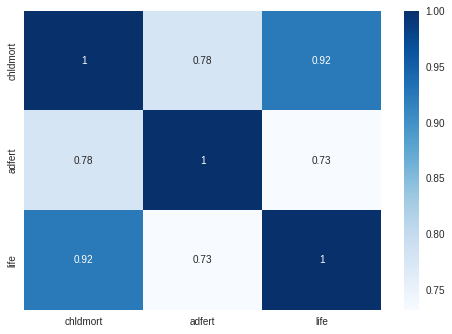

In [36]:
# Usa esta celda para generar heatmap solicitado, con valores > 0.6
sns.heatmap(df_corr[df_corr>0.6], cmap="Blues", annot=True)

**Comentarios**

###  4. A partir de las principales correlaciones, separarlas en un nuevo objeto y calcular la matriz de correlaciones para todas las regiones (3 puntos):
- Comente brevemente las principales correlaciones a través de las regiones.

In [43]:
# Usa esta celda para generar df con las variables con principales correlaciones, de ser necesario
df_2 = df[my_cols + ['region']]
df_2.head()

,chldmort,adfert,life,region
0,34.75,7.300000,72.316666,Africa
1,122.75,111.699997,54.733334,Africa
2,60.25,52.099998,52.250000,Africa
3,170.50,124.800003,53.783333,Africa
4,168.50,18.600000,48.866665,Africa


In [44]:
# Usa esta celda para generar la matriz de correlaciones para cada región
africa = df_2[df_2['region'] == 'Africa'].corr().abs()

<AxesSubplot:>

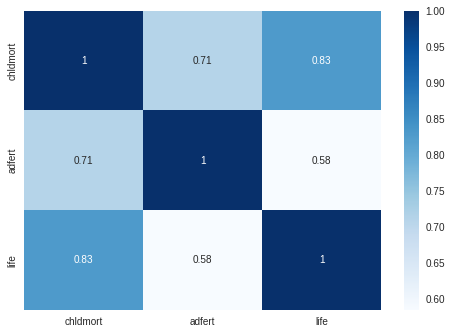

In [45]:
# Usa esta celda para mostrar las correlaciones de Africa
sns.heatmap(africa, cmap='Blues', annot=True)

**Comentarios**

In [47]:
# Usa esta celda para mostrar las correlaciones de Americas
america = df_2[df_2['region'] == 'Americas'].corr().abs()

**Comentarios**

<AxesSubplot:>

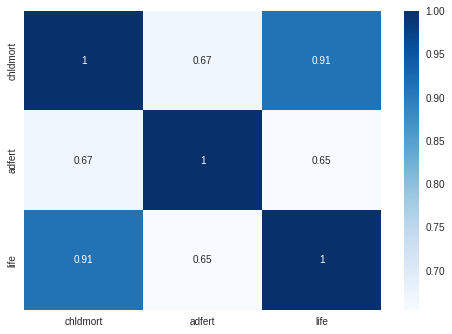

In [52]:
# Usa esta celda para mostrar las correlaciones de Asia
asia = df_2[df_2['region'] == 'Asia'].corr().abs()
sns.heatmap(asia, cmap='Blues', annot=True)


**Comentarios**

<AxesSubplot:>

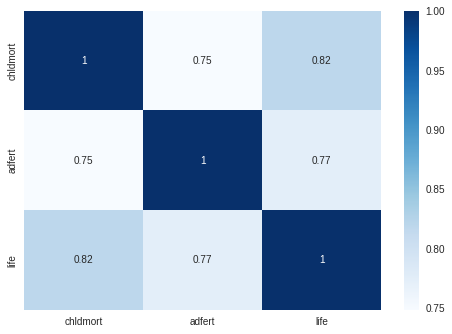

In [51]:
# Usa esta celda para mostrar las correlaciones de Europe
europa = df_2[df_2['region'] == 'Europe'].corr().abs()
sns.heatmap(europa, cmap='Blues', annot=True)

**Comentarios**

In [ ]:
# Usa esta celda para mostrar las correlaciones de Oceanía
europa = df_2[df_2['region'] == 'Europe'].corr().abs()
sns.heatmap(europa, cmap='Blues', annot=True)

**Comentarios**